# TP1 Analyse : Séries de Fourier 

<u>***Un compte rendu est à déposer sur e-campus à la fin de la séance***</u>. *Il doit être rédigé directement dans ce document avec votre code que vous pourrez executer à partir de ce fichier section par section.*

*Il vous est demandé de montrer les résultats, de les analyser et les interpréter tout en répondant aux questions. Nous jugerons vos capacités à comprendre et interpréter mathématiquement les réalisations.*

**Assurez-vous toujours de la lisibilité des graphiques : intitulés des axes, légende, échelle, etc.**

<u>***Avant de rendre votre travail :***</u>
* ✅ *Exécutez toutes les cellules*
* ✅ *Assurez vous que tous vos résultats/figures sont bien visibles*
* ✅ *Exportez le fichier en format **pdf***
* ✅ *Déposez le **pdf** sur e-campus*

In [94]:
import matplotlib.pyplot as plt
import numpy as np

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

## 1- Mise en place des signaux d'études

### 🛠️ 1.1  Construction des signaux (2 pts)
Le programme-ci dessous permet de générer, sur 2000 points, un signal sinusoidal d'amplitude 1, de fréquence 20Hz, échantillonné à 8kHz . 

🧩 Ecrivez le code qui permet de le visualiser en fonction du temps.

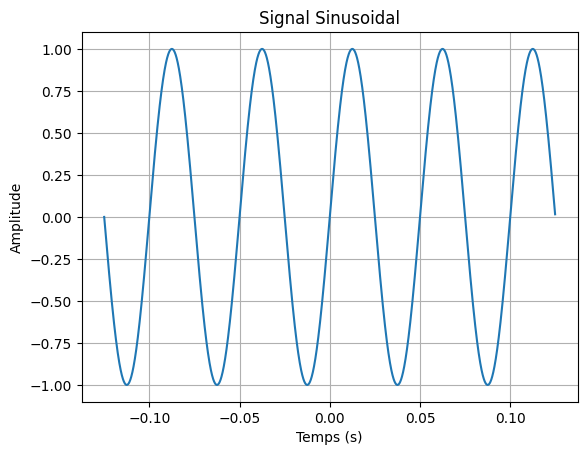

In [95]:
F0 = 20    #fréquence du sinus en Hz
Fe = 8000  #fréquence d'échantillonnage en Hz
N = 2000   #nombre de points

t = np.arange(-N/2, N/2) / Fe  #échelle de temps

sinus1 = np.sin(2 * np.pi * F0 * t)    #signal sinusoidal construit

#*******************************************************************************
# écrire ici le code qui trace le signal sinusoidal sinus1 en fonction du temps
#*******************************************************************************

plt.plot(t, sinus1)
plt.title("Signal Sinusoidal")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()

🧩 Fabriquez (sur la même échelle de temps que précédemment) deux signaux supplémentaires:
- **sinus3** de fréquence 60Hz et d'amplitude 1/3
- **sinus5** de fréquence 100Hz et d'amplitude 1/5

Tracez-les sur le même graphique que **sinus1**

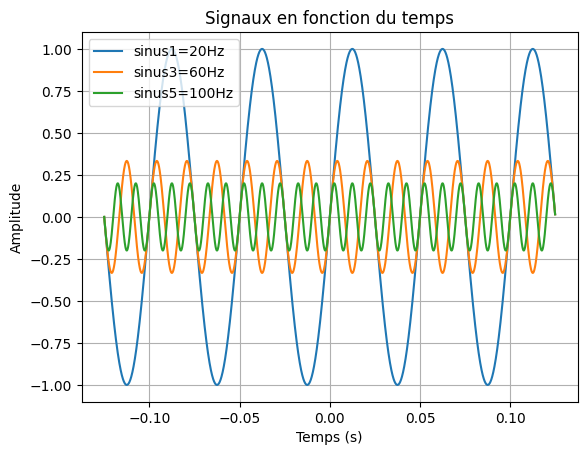

In [96]:
#************************************************************************************
# écrire ici le code qui fabrique sinus3 et sinus5 et les trace en fonction du temps
#************************************************************************************

sinus3 = np.sin(2 * np.pi * 60 * t) * 1/3
sinus5 = np.sin(2 * np.pi * 100 * t) * 1/5

plt.figure()
plt.plot(t, sinus1, label="sinus1=20Hz")
plt.plot(t, sinus3, label="sinus3=60Hz")
plt.plot(t, sinus5, label="sinus5=100Hz")
plt.title("Signaux en fonction du temps")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

🧩 Calculez la somme **sinus1+sinus3+sinus5** et tracez-la comme ci-dessous

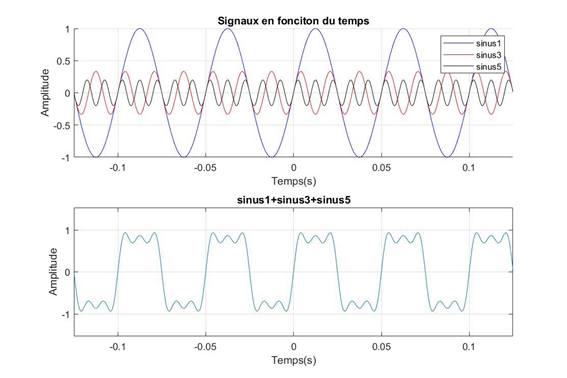

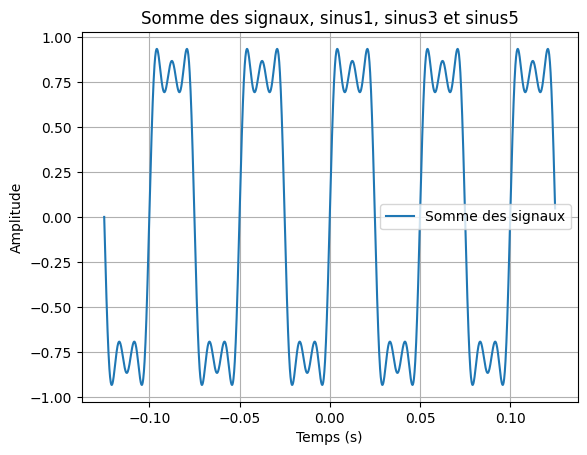

In [97]:
#************************************************************************************
# écrire ici le code qui trace la somme des trois signaux
#************************************************************************************

plt.figure()
plt.plot(t, sinus1 + sinus3 + sinus5, label="Somme des signaux")
plt.title("Somme des signaux, sinus1, sinus3 et sinus5")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

### ✏️ 1.2  Objectifs (4 pts)

❓ Qu’essayons-nous de faire avec cette construction de signaux ?

Avec la construction de ces signaux, on essaye de représenter un signal périodique complexe en le décomposant en une somme de signaux sinusoïdaux simples (harmoniques). Il forme ainsi un signal carré.

❓ Pourquoi ne considérons nous que les sinus de rang impair ? (**justifiez**)

On considère uniquement les sinus de rang impair car ils permettent de définir a0 = 0 et an = 0 dans le développement en série de Fourier, ce qui est une caractéristique des signaux en créneaux, et permettent également de simplifier les coefficients bn.

❓Quelle fréquence et quelle amplitude devrait avoir le signal **sinus7**

Le signal **sinus7** devrait avoir une fréquence de 140Hz et une amplitude de 1/7.

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

## 2- Critères de qualité

Nous voulons déterminer le **nombre minimal d’harmoniques** nécessaires pour que notre reconstruction d’un signal carré soit de **"bonne qualité"**.

### 2.1 Approche qualitative (visuelle)
On se propose d'abord d'itérer en rajoutant des harmoniques jusqu'à ce que le signal construit reste, à tout instant, dans une bande de ± 5 % autour du signal de référence (c’est‑à‑dire entre 95 % et 105 % de son amplitude).

Pour pouvoir mesurer cet écart, il faut d’abord disposer d’un signal carré  idéal  contre lequel comparer la somme partielle des sinusoïdes. Un moyen simple de le créer est :

In [98]:
carre_ideal = (np.pi/4) * np.sign(sinus1)

*(Le facteur π/4 provient du rapport théorique entre l’amplitude du signal carré parfait et celle de son harmonique fondamental.)*

🧩 Construisez les deux signaux limites qui représentent les bornes d'érreur tolérées

In [99]:
#************************************************************************************
# écrire ici le code qui fabrique carre_inf et carre_sup
#************************************************************************************
carre_inf = carre_ideal * 0.95
carre_sup = carre_ideal * 1.05

#### 🛠️ Calcul de la série de Fourier (2 pts)

🧩 Ecrivez une boucle qui permet de calculer la somme de signaux sinusoidaux de rang impair jusqu'au rang N. 

🧩 Tracez sur un même graphique : *carre_ideal*, *carre_inf*, *carre_sup* et *somme* comme ci-dessous

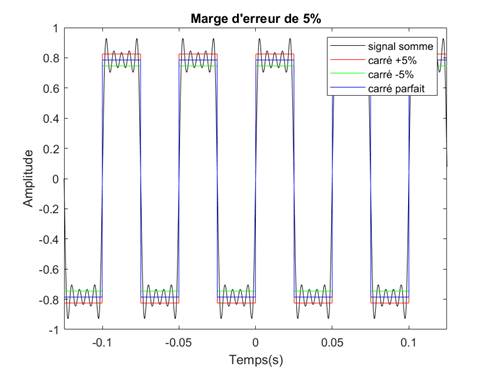


⚙️Exécutez avec plusieurs valeurs de N , et notez le plus petit N pour lequel la somme reconstruite est entièrement contenue entre les deux bornes de 5%

🙋‍♀️**Appelez un encadrant une fois que vous avez trouvé**

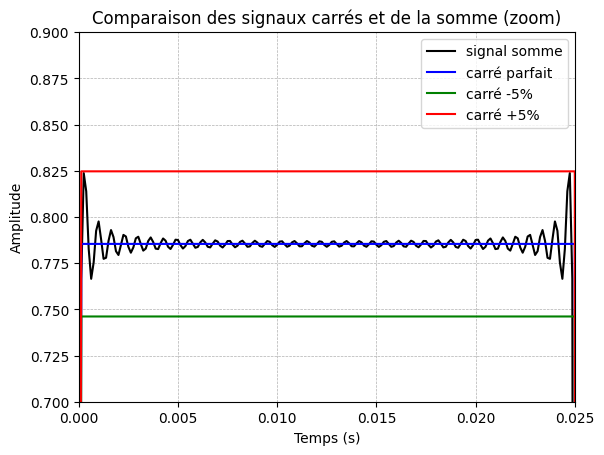

In [100]:
#***********************************************************************************************************
# écrire ici le code qui permet de calculer la somme et tracer carre_ideal, carre_inf, carre_sup et somme.
#***********************************************************************************************************
#définition de N
N=325  #A MODIFIER
F0=20

#boucle pour calculer la somme
somme = np.zeros_like(t)

for i in range(1, N, 2): 
    current = np.sin(2 * np.pi * F0*i * t) * 1/i
    somme += current

#tracé des courbes
plt.figure()
plt.plot(t, somme, label="signal somme", color='black')
plt.plot(t, carre_ideal, label="carré parfait", color='blue')
plt.plot(t, carre_inf, label="carré -5%", color='green')
plt.plot(t, carre_sup, label="carré +5%", color='red')
plt.title("Comparaison des signaux carrés et de la somme (zoom)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)

plt.xlim(0, 1 / F0 / 2)
plt.ylim(0.7, 0.9)

plt.show()

#### ✏️ Interprétation (6 pts)

❓Pourquoi cette première estimation de N est-elle érronnée ?

Cette première estimation de N est erronée car elle repose uniquement sur une observation visuelle, et ainsi ne garantie pas que le signal reconstruit respecte les critères de qualité.

❓Quelle(s) modification(s) devez-vous apportez au code afin de visualiser correctement les dépassements ? 

On peut zoomer sur une partie du graphique où le signal reconstruit dépasse les bornes pour mieux visualiser les dépassements.

❓**Une fois que vous avez corrigé votre code**, essayez de répondre de nouveau à la question: Combien d'harmoniques faut-il pour respecter la marge des ± 5 % en tout point ?

Visuellement, après modification du code, il faut environ 325 harmoniques pour respecter la marge des ± 5 % en tout point.

❓Ce critère qualitatif vous semble-il pertinent ? Autrement dit, pensez-vous qu'il est
pertinent de juger de la qualité d’un signal en se basant sur un dépassement en tout point ? (indépendamment du fait que le critère soit satisfait ou pas). 

### 2.2 Approche quantitative

On se propose d’évaluer un autre critère de qualité, cette fois quantitatif : **l’erreur quadratique moyenne**.

#### 🛠️ Implémentation (3 pts)

🧩 Calculez cette erreur entre le signal *carre_ideal* de référence et le signal composé (cf. TP2 de remise à niveau) pour N=100

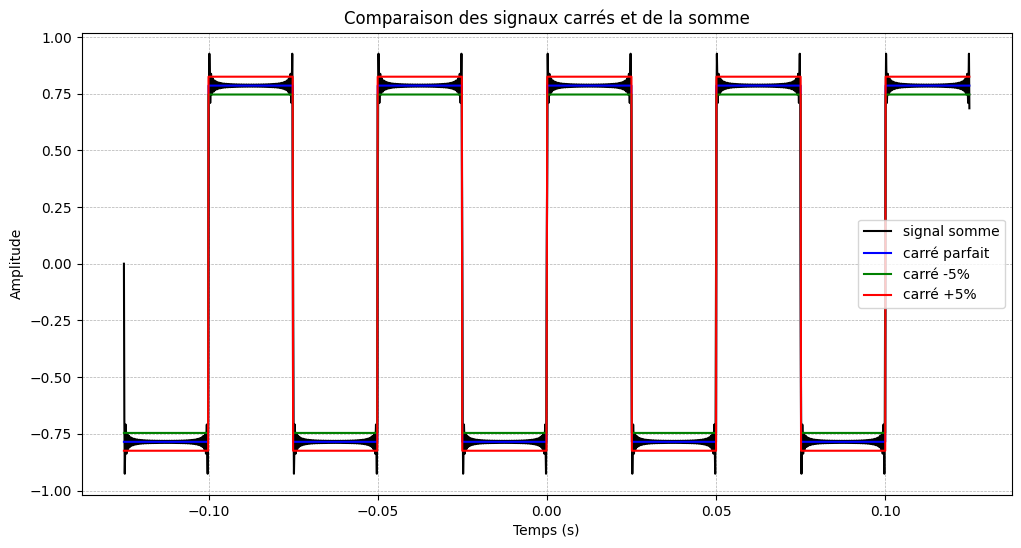

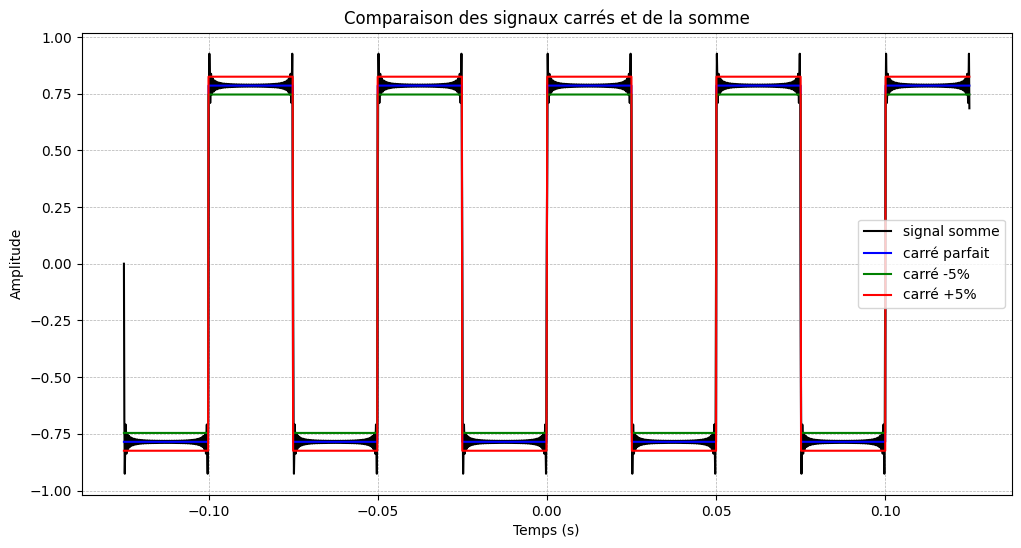

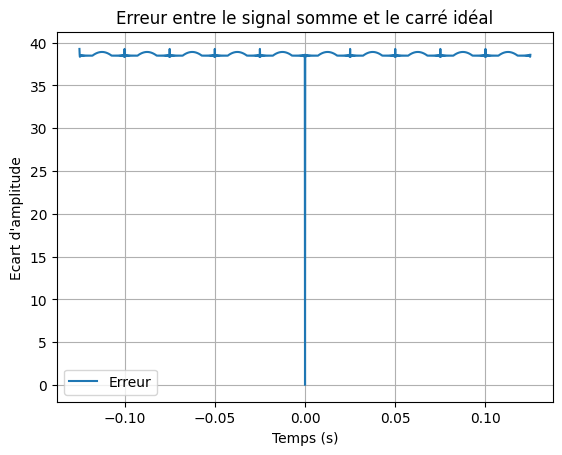

In [101]:
#************************************************************************************
# écrire ici le code qui calcule l'erreur entre carre_ideal et somme pour N=100
#************************************************************************************

#définition de N
N=100  #A MODIFIER
F0=20

#boucle pour calculer la somme
somme = np.zeros_like(t)
erreur = 0
for i in range(1, N, 2): 
    current = np.sin(2 * np.pi * F0*i * t) * 1/i
    somme += current

plt.figure(
    figsize=(12, 6),
    linewidth=1
)
plt.plot(t, somme, label="signal somme", color='black')
plt.plot(t, carre_ideal, label="carré parfait", color='blue')
plt.plot(t, carre_inf, label="carré -5%", color='green')
plt.plot(t, carre_sup, label="carré +5%", color='red')
plt.title("Comparaison des signaux carrés et de la somme")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

erreur = 0
for i in range(1, N, 2): 
    current = np.sin(2 * np.pi * F0*i * t) * 1/i
    erreur += np.abs(current - carre_ideal)

# tracer l'évolution de l'erreur
plt.figure()
plt.plot(t, erreur, label="Erreur")
plt.title("Erreur entre le signal somme et le carré idéal")
plt.xlabel("Temps (s)")
plt.ylabel("Ecart d'amplitude")
plt.legend()
plt.grid()

🧩 Tracez l’erreur en fonction du nombre d’harmoniques 

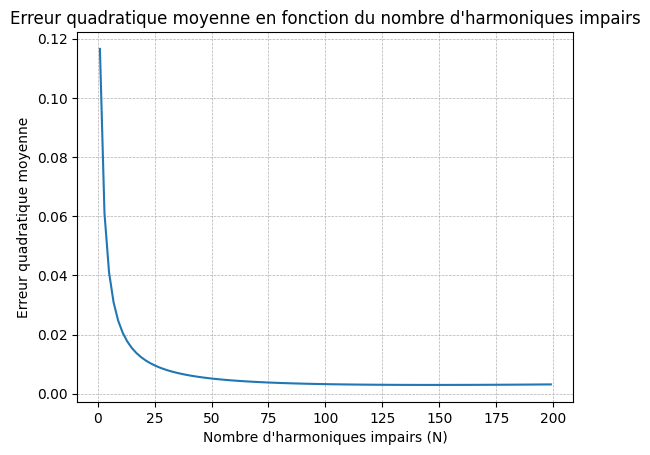

In [102]:
#************************************************************************************
# écrire ici le code qui trace l'erreur en fonction du nombre d'harmoniques
#************************************************************************************

F0 = 20
maxN = 200

somme = np.zeros_like(t)
harmoniques = []
erreur_quadratique = []

for i in range(1, maxN, 2):
    somme += np.sin(2 * np.pi * F0 * i * t) / i
    harmoniques.append(i)
    erreur_quadratique.append(np.mean((somme - carre_ideal)**2))

plt.figure()
plt.plot(harmoniques, erreur_quadratique)
plt.title("Erreur quadratique moyenne en fonction du nombre d'harmoniques impairs")
plt.xlabel("Nombre d'harmoniques impairs (N)")
plt.ylabel("Erreur quadratique moyenne")
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

#### ✏️ Analyse (3 pts)
❓Commentez la forme de la courbe. Que peut-on en tirer ?

La courbe représentant l'erreur quadratique moyenne, décroît quand le nombre d'harmonique augmente. Ainsi, plus le nombre d'harmonique est élevée, plus l'erreur (écart) du signal reconstruit par rapport au signal idéal sera faible. 

❓Conclure sur les critères de qualité

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹

🗂️ <u>***Avant de rendre votre travail :***</u>
* ✅ *Exécutez toutes les cellules*
* ✅ *Assurez vous que tous vos résultats/figures sont bien visibles*
* ✅*Exportez le fichier en format **pdf***
* ✅ *Déposez le **pdf** sur e-campus*